# PSI Walkthrough



In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from psi import calculate_psi

In [20]:
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(new, shade = True)
sns.despine(left = True)

rs = np.random.RandomState(5)

initial = rs.normal(size = 100)
new = rs.normal(loc = 0.2, size = 120)

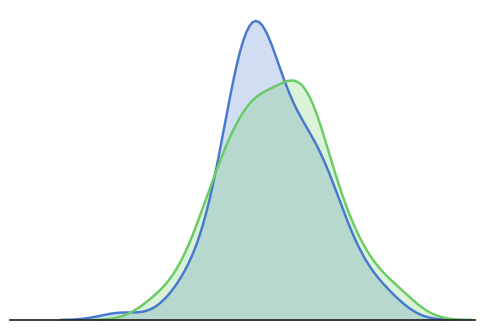

In [33]:
plot = sns.kdeplot(initial, shade=True)
plot = sns.kdeplot(new, shade=True)
plot.set(yticklabels=[], xticklabels = [])
sns.despine(left=True)

In [34]:
buckets = 10
breakpoints = np.arange(0, buckets + 1) / (buckets) * 100
quantiles = np.stack([np.percentile(initial, b) for b in breakpoints])

In [52]:
def generate_counts(arr, quantiles):
            '''Generates counts for each bucket by using the quantile values 
            
            Args:
               arr: ndarray of actual values
               quantiles: list of quantile values
            
            Returns:
               counts: counts for elements in each bucket, length of quantiles array minus one
            '''
    
            def count_in_range(arr, low, high, start):
                '''Counts elements in array between low and high values.
                   Includes value if start is true
                '''
                if start:
                    return(len(np.where(np.logical_and(arr>=low, arr<=high))[0]))
                return(len(np.where(np.logical_and(arr>low, arr<=high))[0]))
        
            
            counts = np.zeros(len(quantiles)-1)
        
            for i in range(1, len(quantiles)):
                counts[i-1] = count_in_range(arr, quantiles[i-1], quantiles[i], i==1)
        
            return(counts)
        
        
initial_counts = generate_counts(initial, quantiles)
new_counts = generate_counts(new, quantiles)

In [63]:
df = pd.DataFrame({'Quantile Group': np.arange(1, 11), 'Quantile Value':quantiles[1:], 'Initial Count':initial_counts, 'New Count':new_counts})
df['Initial Percent'] = df['Initial Count'] / len(initial)
df['New Percent'] = df['New Count'] / len(new)

In [64]:
df

,Initial Count,New Count,Quantile Group,Quantile Value,Initial Percent,New Percent
0,10.0,20.0,1,-0.875615,0.1,0.166667
1,10.0,8.0,2,-0.605002,0.1,0.066667
2,10.0,6.0,3,-0.423865,0.1,0.050000
3,10.0,8.0,4,-0.225397,0.1,0.066667
4,10.0,9.0,5,-0.062951,0.1,0.075000
5,10.0,9.0,6,0.207098,0.1,0.075000
6,10.0,14.0,7,0.578734,0.1,0.116667
7,10.0,17.0,8,0.892560,0.1,0.141667
8,10.0,13.0,9,1.296252,0.1,0.108333
9,10.0,13.0,10,2.430771,0.1,0.108333


In [92]:
percents = df[['Initial Percent', 'New Percent', 'Quantile Group']] \
             .melt(id_vars=['Quantile Group']) \
             .rename(columns={'variable':'Population', 'value':'Percent'})

In [93]:
percents.head()

,Quantile Group,Population,Percent
0,1,Initial Percent,0.1
1,2,Initial Percent,0.1
2,3,Initial Percent,0.1
3,4,Initial Percent,0.1
4,5,Initial Percent,0.1


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


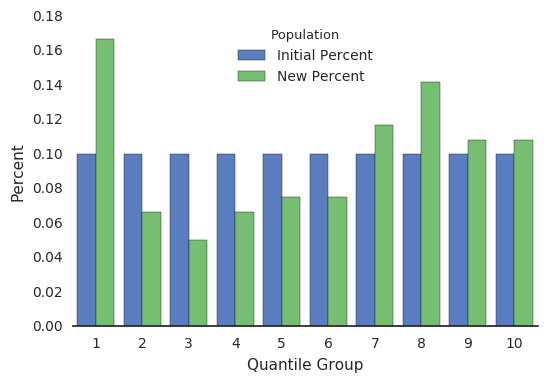

In [91]:
sns.barplot(x="Quantile Group", y="Percent", hue="Population", data=percents)
plot.set(yticklabels=[], xticklabels = [])
sns.despine(left=True)

$PSI = \sum{}\Big(\big(Actual \% - Expected \%\big) \times ln\big(\dfrac{Actual \%}{Expected \%}\big)\Big)$

In [86]:
df['PSI'] = (df['New Percent'] - df['Initial Percent']) * np.log(df['New Percent'] / df['Initial Percent'])

In [88]:
np.sum(df['PSI'])

0.1285435134950522

In [99]:
np.round(calculate_psi(initial, new, buckets=10, axis=1), 5) == np.round(np.sum(df['PSI']), 5)

True